# Language Analysis of toxic comments in game review forums

#### Import nltk, matplotlib, pandas, and numpy:

In [11]:
import nltk

# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

# set matplotlib environment and import some basics
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd


#### Sets dimensions of pandas table:

In [12]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 100 # set to -1 to see entire text

#### Loads documents (false/true determines data length):

In [13]:
if True:
    # comment filename
    commentfile = 'toxicity_annotated_comments_unanimous.tsv'
    # rating filename
    ratingfile = 'toxicity_annotations_unanimous.tsv'

# full data set
    # comment filename
    commentfile = 'toxicity_annotated_comments.tsv'
    # rating filename
    ratingfile = 'toxicity_annotations.tsv'

#### Read Documents and store Pandas "Dataframe" type to variable:

In [14]:
# load annotated comments
commentdata = pd.read_table(commentfile)
ratingdata = pd.read_table(ratingfile)

# remove tab/newline TOKEN text (messy data)
commentdata['comment'] = commentdata['comment'].str.replace('NEWLINE_TOKEN',' ')
commentdata['comment'] = commentdata['comment'].str.replace('TAB_TOKEN',' ')

print(type(commentdata))

<class 'pandas.core.frame.DataFrame'>


#### Check shape of DataFrame:

In [15]:
# show shape of each data set
print("commentdata.shape = ",commentdata.shape)
print("ratingdata.shape = ",ratingdata.shape)

commentdata.shape =  (159686, 7)
ratingdata.shape =  (1598289, 4)


#### Count Punctuation Function:

In [16]:
from string import punctuation
from collections import Counter

def punc_count(string_value):
    count = 0
    for c in string_value:
        if c in punctuation:
            count+= 1
    punc_perc = len(string_value)
    if punc_perc != 0:
        punc_perc = float(count / punc_perc) * 100
    else:
        punc_perc = 0
    
    return punc_perc

#### Add and manipulate data columns:

In [17]:
# group all scores by comment ID for each text sample, add mean and median score columns to comment data 
commentdata["mean_score"] = pd.Series(ratingdata.groupby("rev_id",as_index=False).mean()["toxicity_score"])
commentdata["median_score"] = pd.Series(ratingdata.groupby("rev_id",as_index=False).median()["toxicity_score"])

# Add columns for comment length and punctuation count
commentdata["com_len"] = pd.Series(commentdata["comment"].str.len())
commentdata["pun_per"] = pd.Series(commentdata["comment"].apply(punc_count))

# create categorical variable toxicity: if median score < 0, toxicity=1, otherwise 0
commentdata["toxicity"] = (commentdata["median_score"] < 0).astype(int)

# Delete Columns
del commentdata['year']
del commentdata['logged_in']

#### Print Table Template with example values:

In [188]:
# prints basic data table structure
print("commentdata.shape = ",commentdata.shape)
commentdata.head()

# prints longer data table: 
display (commentdata)

commentdata.shape =  (159686, 11)


,rev_id,comment,ns,sample,split,mean_score,median_score,com_len,pun_per,toxicity,stemmed
0,2232.0,This: :One can make an analogy in mathematical terms by envisioning the distribution of opinions...,article,random,train,0.400000,0.5,651,2.457757,0,one make analog mathemat term envis distribut opinion popul gaussian curv would say consensu wou...
1,4216.0,"` :Clarification for you (and Zundark's right, i should have checked the Wikipedia bugs page f...",user,random,train,0.500000,0.0,611,4.746318,0,clarif zundark right check wikipedia bug page first bug code make wikipedia work mean line code ...
2,8953.0,Elected or Electoral? JHK,article,random,test,0.100000,0.0,25,4.000000,0,elect elector jhk
3,26547.0,`This is such a fun entry. Devotchka I once had a coworker from Korea and not only couldn't s...,article,random,train,0.600000,0.0,2976,6.854839,0,fun entri devotchka cowork korea couldnt tell differ usaenglish british english troubl tell diff...
4,28959.0,"Please relate the ozone hole to increases in cancer, and provide figures. Otherwise, this articl...",article,random,test,0.200000,0.0,197,2.538071,0,pleas relat ozon hole increas cancer provid figur otherwis articl bias toward environmentalist a...
5,35367.0,"`:In an interpreted language your source code is read in command by command by a software tool, ...",article,random,dev,0.200000,0.0,4214,4.200285,0,interpret languag sourc code read command command softwar tool call interpret execut commandbyco...
6,37330.0,` I fixed the link; I also removed ``homeopathy`` as an exampleit's not anything like a legiti...,article,random,train,0.100000,0.0,379,4.749340,0,fix link also remov homeopathi exampleit anyth like legitim protosci even halflegit total pseudo...
7,37346.0,`If they are ``indisputable`` then why does the NOAA dispute it? Note that the NOAA is the same ...,article,random,train,0.200000,0.0,365,4.109589,0,indisput noaa disput note noaa sourc use advoc cfcozoneuvcanc connect noaa trustworthi support e...
8,37675.0,`- This is not ``creative``. Those are the dictionary definitions of the terms ``insurance`` an...,article,random,dev,0.300000,0.0,2397,7.092199,0,creativ dictionari definit term insur ensur properli appli destruct dont understand fine legitim...
9,44377.0,"` The concept of ``viral meme`` is not a mainstream academic concept, and only merits the brie...",article,random,train,0.800000,1.0,668,5.838323,0,concept viral meme mainstream academ concept merit briefest mention encyclopedia meme alreadi tr...


#### Convert Data to Dict

In [19]:
toxicity_dict = {}
com_len_dict = {}

toxicity_dict = commentdata['median_score'].value_counts().to_dict()

for key in toxicity_dict:
    com_len_dict[key] = int(commentdata.loc[commentdata['median_score']==key, ['com_len']].mean())

print('Toxicity Dict: ')
print(toxicity_dict)
print('Comment Length Dict: ')
print(com_len_dict)

Toxicity Dict: 
{0.0: 84913, 1.0: 35611, 0.5: 20784, -1.0: 12652, -0.5: 3004, -2.0: 1610, -1.5: 1100, 1.5: 11, 2.0: 1}
Comment Length Dict: 
{0.0: 322, 1.0: 569, 0.5: 503, -1.0: 285, -0.5: 409, -2.0: 459, -1.5: 241, 1.5: 519, 2.0: 472}


#### Plot Histogram of Comment Length and Toxicity Comment Count

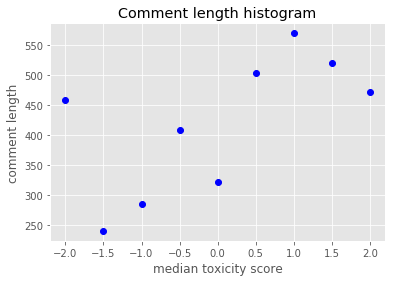

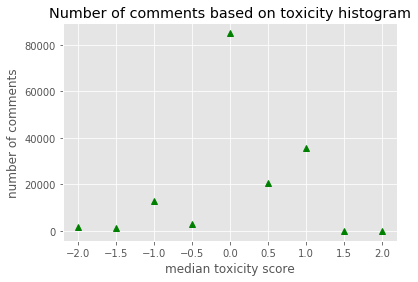

In [20]:
#print (toxicity_annotations_comments_df.loc[toxicity_annotations_comments_df['median_score']==-0.6]['comment_len'].mean())
x,y = zip(*com_len_dict.items())
plt.plot(x,y,'bo')
plt.ylabel('comment length')
plt.xlabel('median toxicity score')
plt.title("Comment length histogram")
plt.show()

w,z = zip(*toxicity_dict.items())
plt.plot(w,z,'g^')
plt.ylabel('number of comments')
plt.xlabel('median toxicity score')
plt.title("Number of comments based on toxicity histogram")
plt.show()

#### Plot Comment Length to Toxicity *(old chart)*

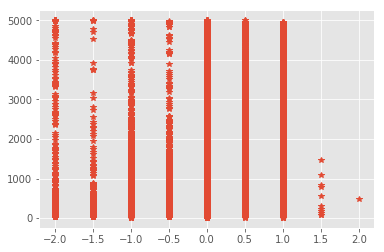

In [21]:
plt.plot(pd.Series(commentdata["median_score"]),pd.Series(commentdata["com_len"]),'*')
plt.show()

#### Plot Punctuation Count to Toxicity *(old chart)*

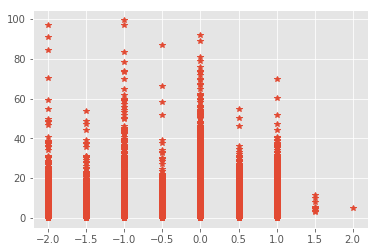

In [22]:
plt.plot(pd.Series(commentdata["median_score"]),pd.Series(commentdata["pun_per"]),'*')
plt.show()

#### Stem and Stopwords Feature Reduction

In [23]:
%%time
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords as sw
ps = PorterStemmer()

# set up regex expression to remove all but alpha chars and whitespace
regex = re.compile('[^a-zA-Z\s]') 

drop_stopwords = True # change this to False to keep stop words

# create set of stop words from nltk corpus
stopwords = set(sw.words('english'))

numsamples = commentdata.comment.shape[0]

# transform each sample text:
stemmed_text = []
for text,i in zip(commentdata.comment,range(numsamples)):
    # set to lower case
    text = regex.sub('',text.lower())
    # look at each word in text
    t = []
    for word in word_tokenize(text):
        if len(word) < 30: # drop "words" that are too long (otherwise stem crashes!)
            if not drop_stopwords or word not in stopwords: # drop stopwords
                t.append(ps.stem(word)) # stem the added word
    stemmed_text.append(" ".join(t)) # re-combine list of stemmed words
    if not i%5000: print(i,',', end="")

commentdata["stemmed"] = pd.Series(np.array(stemmed_text)) # convert list of sample texts to pandas series

        
print("\nstemmed_text:",stemmed_text[:2])

# completed in ~4 min on my laptop

0 ,5000 ,10000 ,15000 ,20000 ,25000 ,30000 ,35000 ,40000 ,45000 ,50000 ,55000 ,60000 ,65000 ,70000 ,75000 ,80000 ,85000 ,90000 ,95000 ,100000 ,105000 ,110000 ,115000 ,120000 ,125000 ,130000 ,135000 ,140000 ,145000 ,150000 ,155000 ,
stemmed_text: ['one make analog mathemat term envis distribut opinion popul gaussian curv would say consensu would statement repres rang opinion within perhap three standard deviat mean opinion sound arbitrari ad hoc realli belong n encyclopedia articl dont see add anyth use paragraph follow seem much use polit theorist clarifi issu seem issu lock rousseau de toquevil other must debat sr', 'clarif zundark right check wikipedia bug page first bug code make wikipedia work mean line code may error small extra space analog simplifi way tri make someth bold html forget put end youd see someth like word bold instead word bold like viru code somebodi deliber wrote order infect comput damag file wont go around jhk']
CPU times: user 2min 40s, sys: 3.09 s, total: 2min

#### Stemmed Tab Added to CommentData

In [24]:
print("commentdata.shape = ",commentdata.shape)
commentdata.head()

commentdata.shape =  (159686, 11)


,rev_id,comment,ns,sample,split,mean_score,median_score,com_len,pun_per,toxicity,stemmed
0,2232.0,This: :One can make an analogy in mathematical terms by envisioning the distribution of opinions...,article,random,train,0.4,0.5,651,2.457757,0,one make analog mathemat term envis distribut opinion popul gaussian curv would say consensu wou...
1,4216.0,"` :Clarification for you (and Zundark's right, i should have checked the Wikipedia bugs page f...",user,random,train,0.5,0.0,611,4.746318,0,clarif zundark right check wikipedia bug page first bug code make wikipedia work mean line code ...
2,8953.0,Elected or Electoral? JHK,article,random,test,0.1,0.0,25,4.000000,0,elect elector jhk
3,26547.0,`This is such a fun entry. Devotchka I once had a coworker from Korea and not only couldn't s...,article,random,train,0.6,0.0,2976,6.854839,0,fun entri devotchka cowork korea couldnt tell differ usaenglish british english troubl tell diff...
4,28959.0,"Please relate the ozone hole to increases in cancer, and provide figures. Otherwise, this articl...",article,random,test,0.2,0.0,197,2.538071,0,pleas relat ozon hole increas cancer provid figur otherwis articl bias toward environmentalist a...


#### Vectorizing Data for Graphing *(not used)*

In [25]:
# %%time

# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer

# # use this instead to only vectorize the text (no TFIDF)
# vec_stemmed = CountVectorizer().fit_transform(stemmed_text)
# print(type(vec_stemmed))

# df = pd.DataFrame(vec_stemmed.toarray())
# df.head()

In [438]:
%%time

from collections import Counter

top_100_dict = {}

# pushes comments to the different toxicity scores and saves as top_100_dict
for key in toxicity_dict:
    top_100_dict[key] = dict(commentdata.loc[commentdata['median_score']==key, ['stemmed']])

# merges words in all comments, then splits the merge by individual word, and then pulls most common words in list
for key in top_100_dict:
    top_100_dict[key] = Counter(" ".join(top_100_dict[key]['stemmed'].tolist()).split()).most_common(5)
    
    print(key,": ", end="")
    print(top_100_dict[key])
    print('')

0.0 : [('articl', 29396), ('page', 21996), ('edit', 18120), ('wikipedia', 14692), ('use', 13296)]

1.0 : [('articl', 28428), ('page', 22429), ('thank', 15287), ('use', 14503), ('wikipedia', 14273)]

0.5 : [('articl', 12899), ('page', 8757), ('edit', 6337), ('use', 5865), ('wikipedia', 5813)]

-1.0 : [('fuck', 3432), ('like', 3169), ('dont', 3066), ('nigger', 2712), ('wikipedia', 2544)]

-0.5 : [('page', 878), ('articl', 856), ('like', 825), ('dont', 821), ('wikipedia', 800)]

-2.0 : [('fuck', 7478), ('suck', 3609), ('shit', 1885), ('ass', 1832), ('faggot', 1576)]

-1.5 : [('fuck', 1144), ('bullshit', 852), ('jew', 706), ('fat', 631), ('gay', 577)]

1.5 : [('wikipedia', 19), ('thank', 15), ('edit', 15), ('page', 13), ('welcom', 10)]

2.0 : [('good', 5), ('progress', 2), ('edit', 2), ('work', 2), ('wiki', 2)]

CPU times: user 1.13 s, sys: 122 ms, total: 1.26 s
Wall time: 1.26 s


#### R2 Scatter Plot (from tutorial)

In [228]:
# Use to Export Data:
# commentdata.to_csv('commentoutput.csv')

In [229]:
# from explorer import FakeDataExplorer
# ex = FakeDataExplorer('commentoutput.csv')
# ex.keys()
# ex.scatter_plots("com_len","median_score")

#### Full Scatter Data Process

##### (pre-normalized)

In [441]:
# make copy of main Panda Dataframe and remove unnessary categories
scatterdata = commentdata.copy()
scatterdata.drop(['ns','sample','split','toxicity','stemmed','comment','rev_id','pun_per','median_score'], axis=1, inplace=True)

# create interval list from max
range_array = []
for i in range(0,5050,50):
    range_array.append(i)
    
# "cut" scatterdata comment length by the range_array to create panda BINS
scatterdata['new_range'] = pd.cut(scatterdata['com_len'],bins=range_array)

# sort scatterdata by new_range
scatterdata = scatterdata.sort_values(by=['new_range'])

# aggregates data into summed values (!!!!!this step may be incorrect!!!!!)
scatterdata = scatterdata.groupby(['new_range']).agg(['sum'])

# drops unneeded column and subcoumn
scatterdata = scatterdata.drop(('com_len', 'sum'), axis=1)

,,mean_score,plot_range
,,sum,
mean_score,sum,1.000000,-0.596302
plot_range,,-0.596302,1.000000


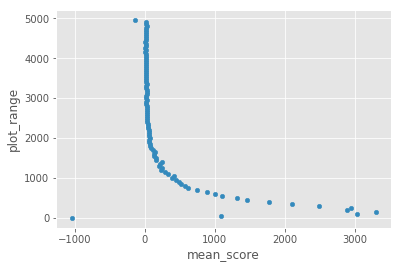

In [442]:
# account for strange extra indice in list (not sure how the index value in the table is being lost)
scatterdata.index = range_array[:-1]

# makes index plottable
scatterdata['plot_range'] = scatterdata.index

# scatterplot
scatterdata.plot.scatter('mean_score','plot_range')

# r correlation calc
scatterdata.corr(method='pearson')

In [444]:
##### (normalized)

[0, 1]


,index,0,1
index,1.000000,-0.596302,1.000000
0,-0.596302,1.000000,-0.596302
1,1.000000,-0.596302,1.000000


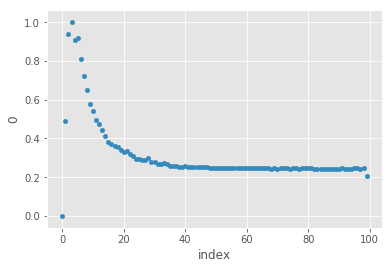

In [443]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(scatterdata)
df_normalized = pd.DataFrame(np_scaled)
print(list(df_normalized))
df_normalized

df_normalized = df_normalized.reset_index()
df_normalized.plot.scatter('index',0)

df_normalized.corr(method='pearson')